Processing Date Reported...
Processing Date of Occurrence...
Processing Date Case Closed...
Processing Time of Occurrence...

Let's look at when these crimes occurred...
Crunching time data - this might take a moment ⏳


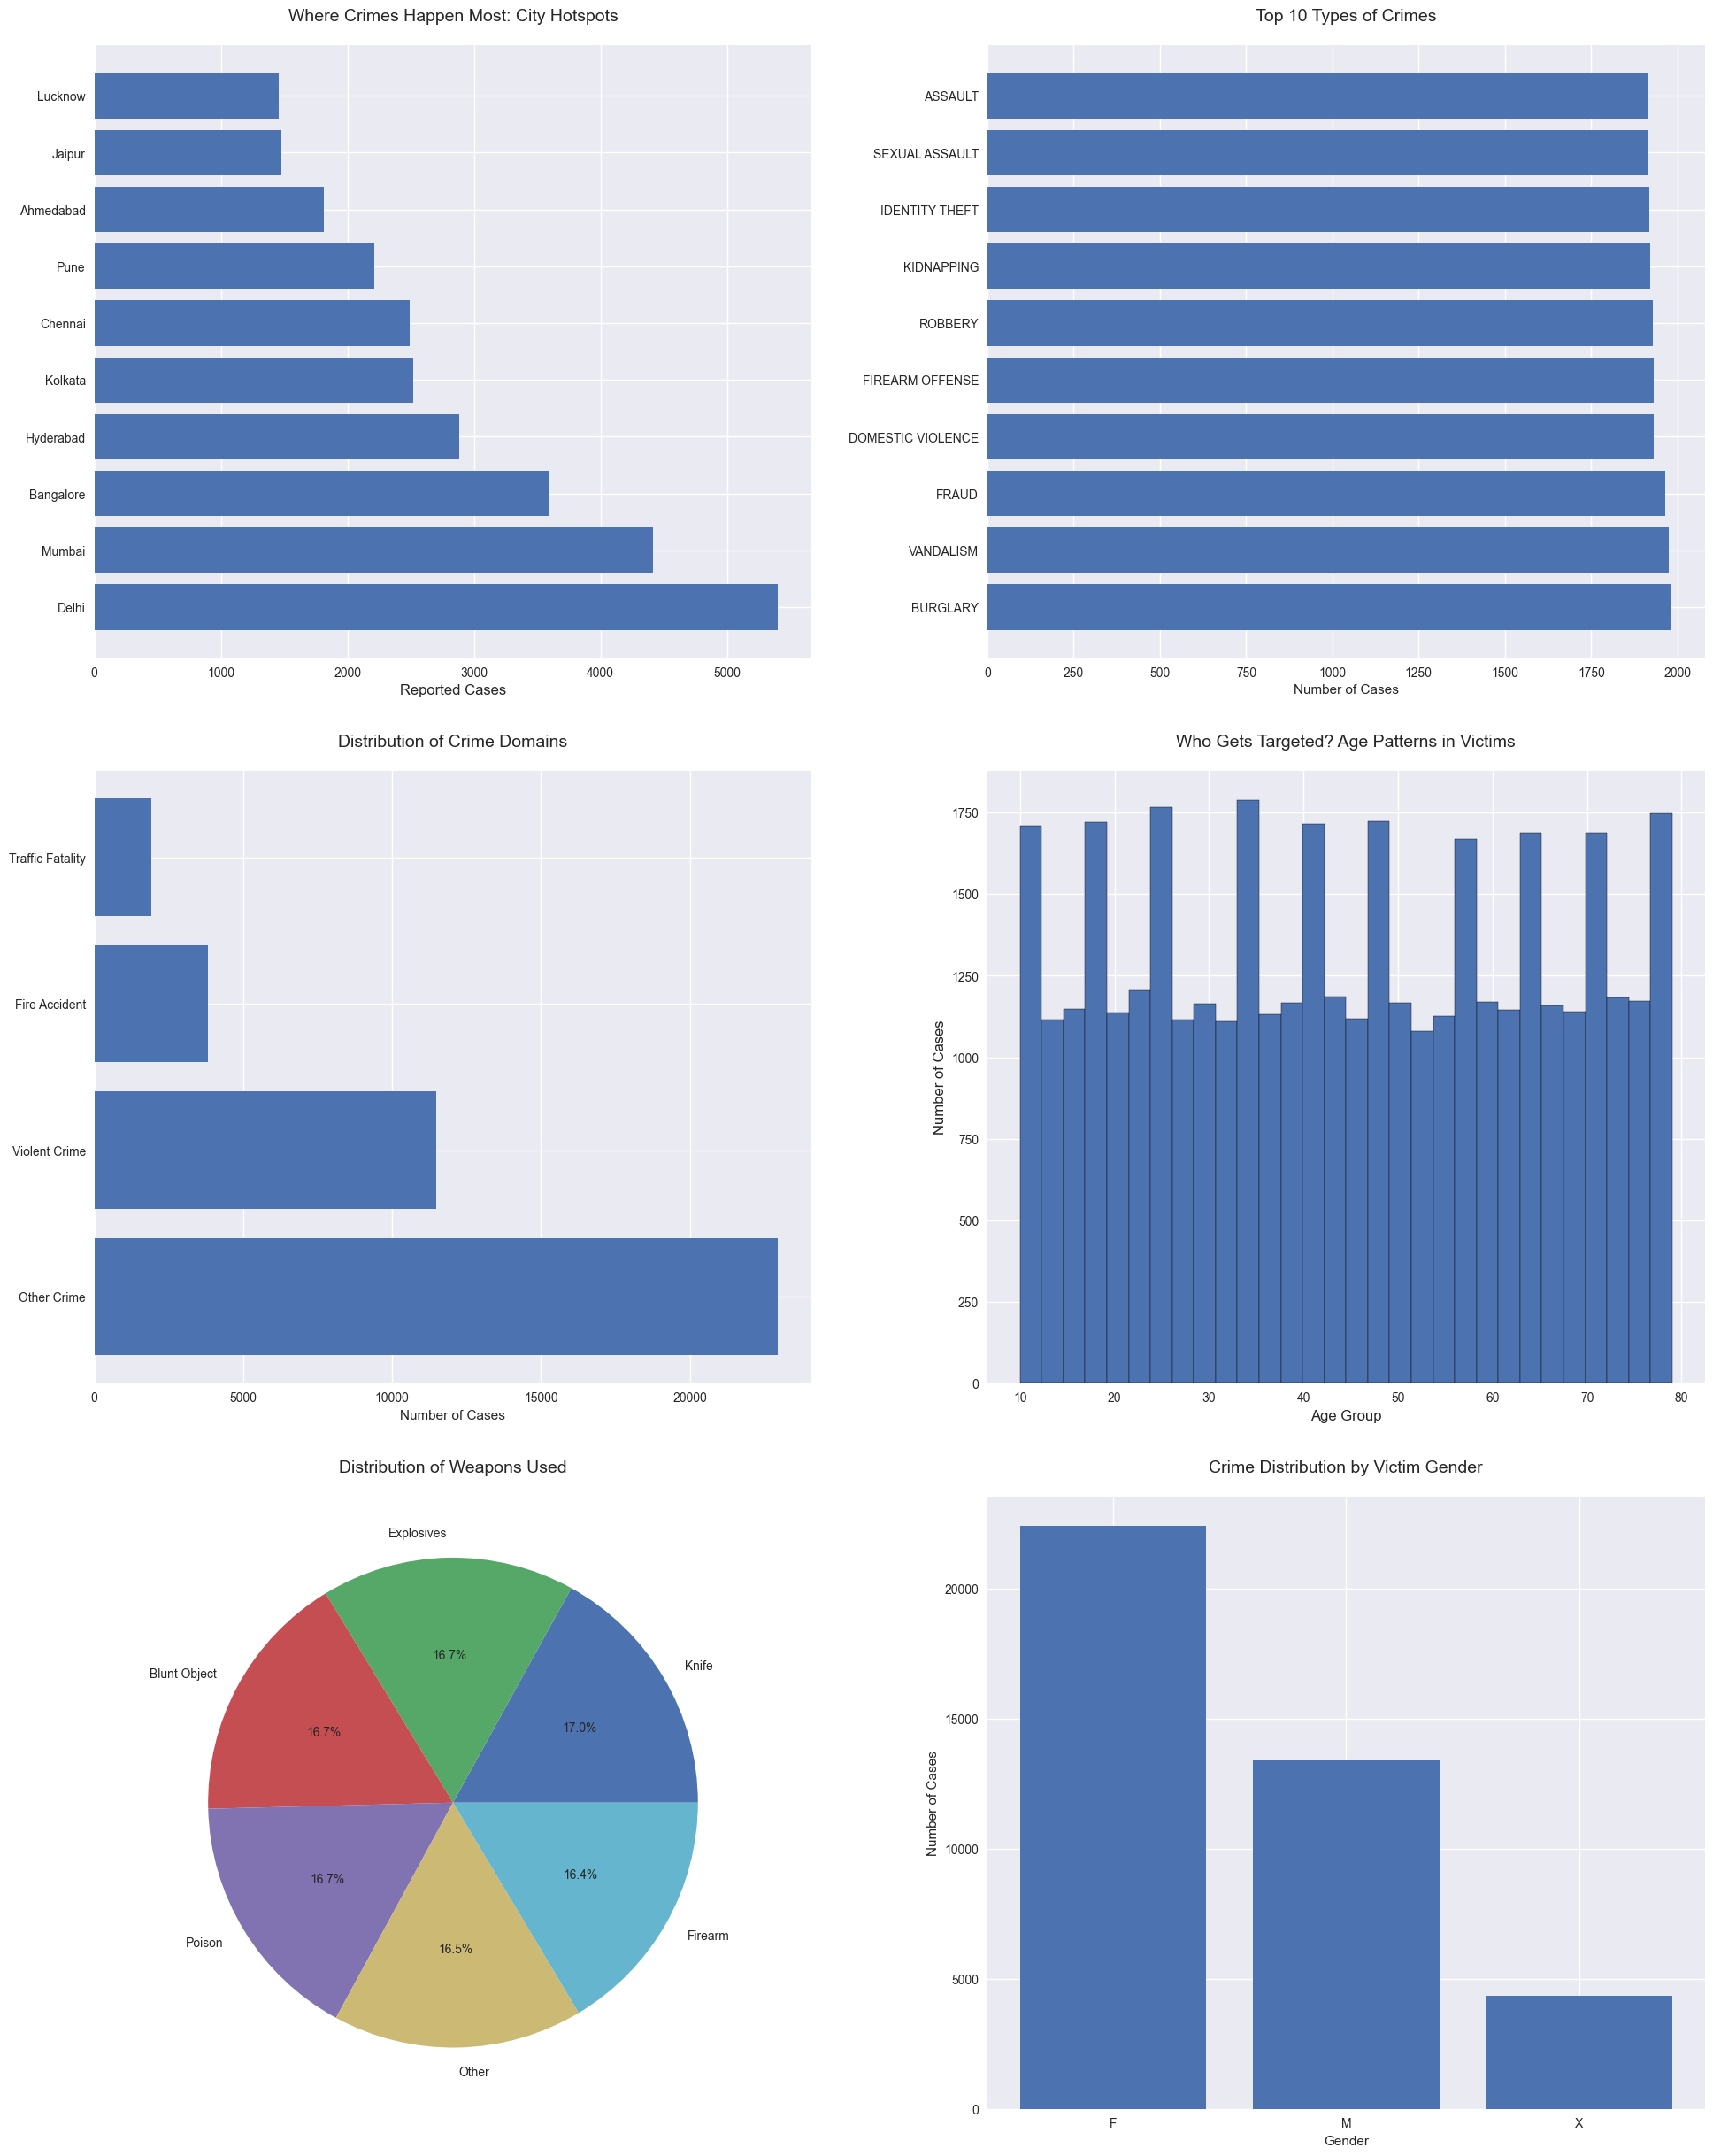

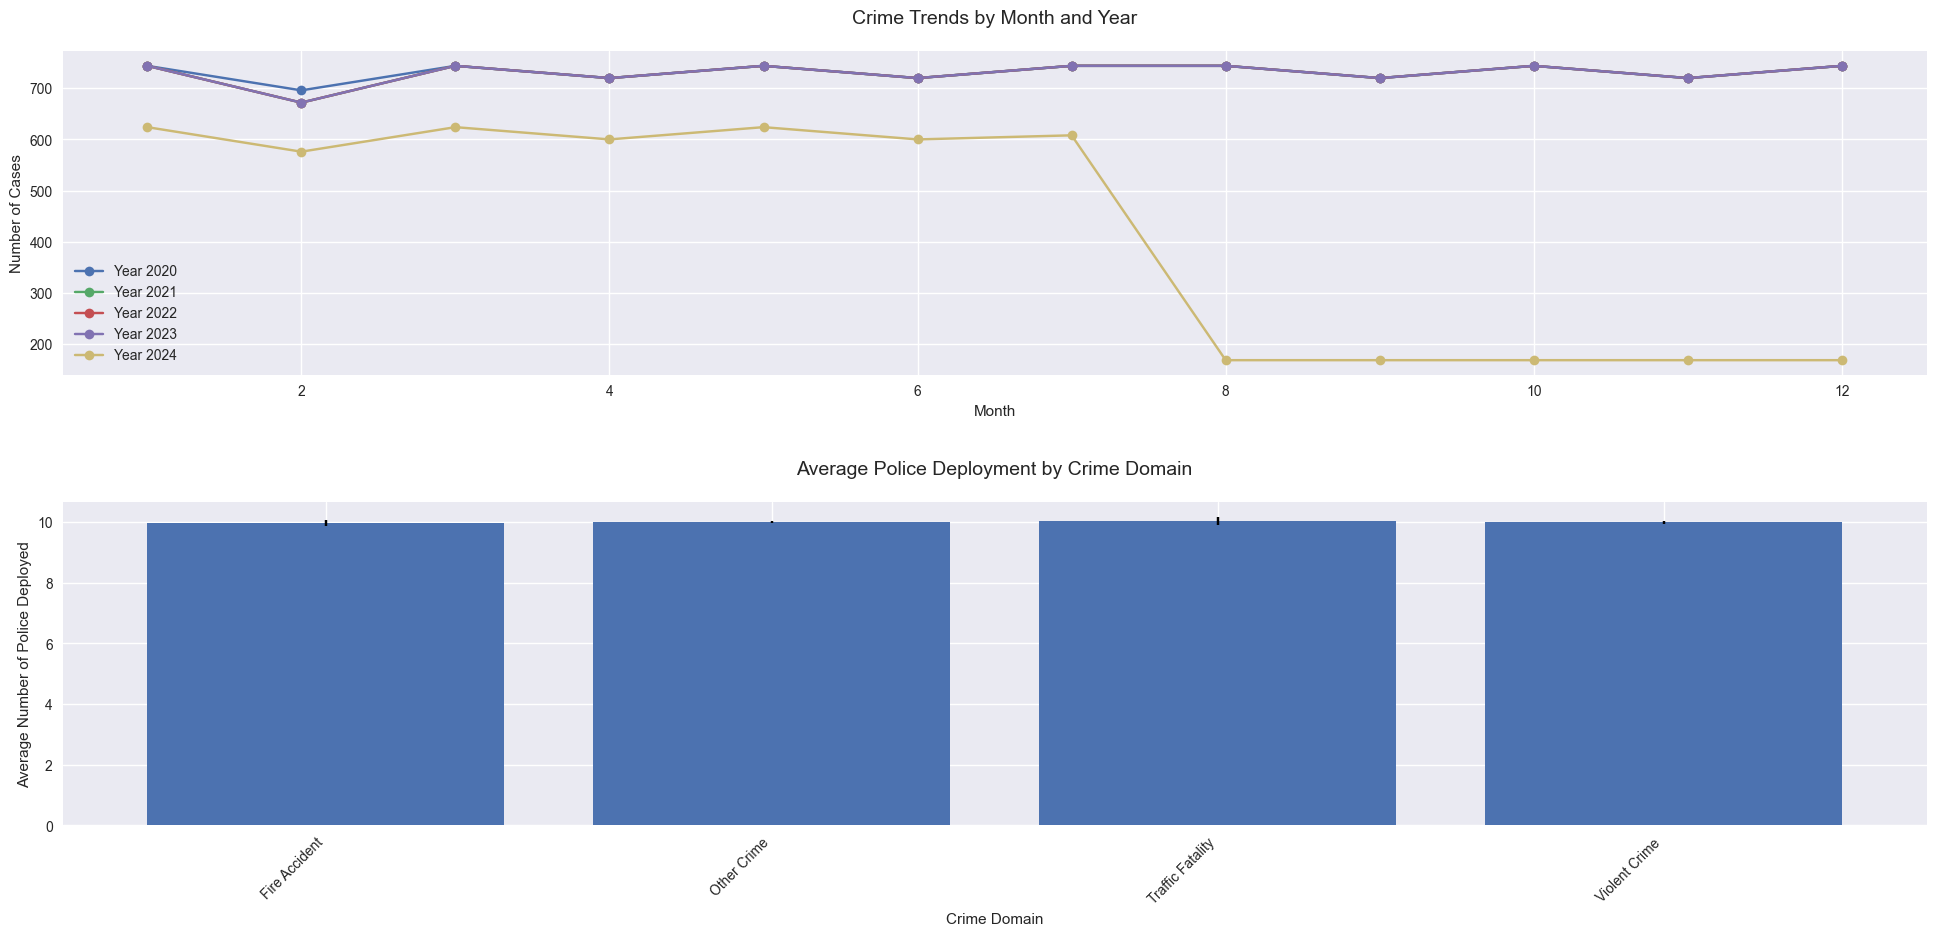

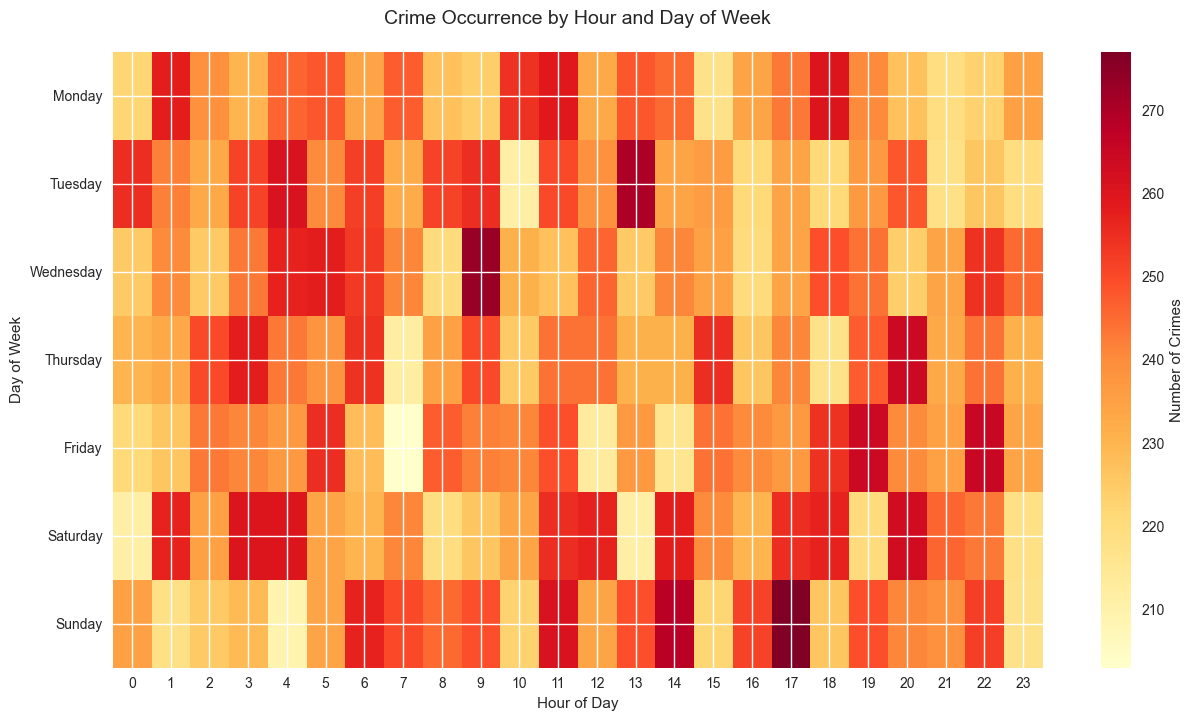

<Figure size 1500x500 with 0 Axes>

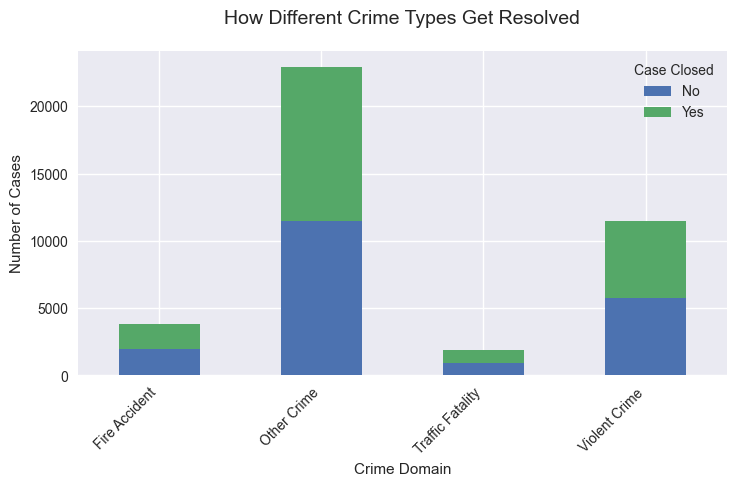


~~~~~~~~~~~~~~~~ WHAT THE DATA TELLS US ~~~~~~~~~~~~~~~

After analyzing 40,160 crime reports, here's what we found:
- Most common crime hours: 11:00-12:00
- Busiest crime day: Saturday
- Typical police response: 10.0 officers per case

-------------------------------------------------------

=== Dataset Information ===

Dataset Shape:
(40160, 18)

Columns in the dataset:
['Report Number', 'Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City', 'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed', 'Date Case Closed', 'Year', 'Month', 'Hour', 'Day']

First few rows of the dataset:
   Report Number       Date Reported  Date of Occurrence  Time of Occurrence  \
0              1 2020-01-02 00:00:00 2020-01-01 00:00:00 2020-01-01 01:11:00   
1              2 2020-01-01 19:00:00 2020-01-01 01:00:00 2020-01-01 06:26:00   
2              3 2020-01-02 05:00:00 2020-01-01 02:00:00 2020-01-01 14:30:00   
3 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Make the charts look nice
plt.style.use('seaborn-v0_8')
  # Clean and professional style

# Read the CSV file
df = pd.read_csv(r"E:\New folder\WIE\INDIA DATASET\crime_dataset_india.csv")

# Function to standardize date format
def standardize_date(date_str):
    try:
        # First try DD-MM-YYYY format
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')
    except:
        try:
            # Then try MM-DD-YYYY format
            return pd.to_datetime(date_str, format='%m-%d-%Y %H:%M')
        except:
            return pd.NaT

# Standardize date columns
date_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed', 'Time of Occurrence']
for col in date_columns:
    print(f"Processing {col}...")
    df[col] = df[col].apply(standardize_date)

# Drop rows where critical dates are NaT
critical_dates = ['Date Reported', 'Date of Occurrence']
df = df.dropna(subset=critical_dates)

# Replace inf values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Extract year and month from Date of Occurrence
df['Year'] = df['Date of Occurrence'].dt.year
df['Month'] = df['Date of Occurrence'].dt.month

# Here's when most crimes were reported and occurred:
print("\nLet's look at when these crimes occurred...")
print("Crunching time data - this might take a moment ⏳")

# Create subplots for multiple visualizations
plt.figure(figsize=(20, 25))

# 1. Crime Distribution by City (Top 10)
plt.subplot(3, 2, 1)
city_data = df['City'].value_counts().nlargest(10).reset_index()
city_data.columns = ['City', 'Count']
plt.barh(city_data['City'], city_data['Count'])
plt.title('Where Crimes Happen Most: City Hotspots', pad=20, fontsize=14)
plt.xlabel('Reported Cases', fontsize=12)
plt.ylabel('', fontsize=12)

# 2. Crime Types Distribution
plt.subplot(3, 2, 2)
crime_data = df['Crime Description'].value_counts().nlargest(10).reset_index()
crime_data.columns = ['Crime', 'Count']
plt.barh(crime_data['Crime'], crime_data['Count'])
plt.title('Top 10 Types of Crimes', pad=20, fontsize=14)
plt.xlabel('Number of Cases')

# 3. Crime Domain Distribution
plt.subplot(3, 2, 3)
domain_data = df['Crime Domain'].value_counts().reset_index()
domain_data.columns = ['Domain', 'Count']
plt.barh(domain_data['Domain'], domain_data['Count'])
plt.title('Distribution of Crime Domains', pad=20, fontsize=14)
plt.xlabel('Number of Cases')

# 4. Victim Age Distribution
plt.subplot(3, 2, 4)
plt.hist(df['Victim Age'].dropna(), bins=30, edgecolor='black')
plt.title('Who Gets Targeted? Age Patterns in Victims', pad=20, fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)

# 5. Weapon Usage Distribution
plt.subplot(3, 2, 5)
weapon_data = df['Weapon Used'].value_counts()
plt.pie(weapon_data.values, labels=weapon_data.index, autopct='%1.1f%%')
plt.title('Distribution of Weapons Used', pad=20, fontsize=14)

# 6. Cases by Gender
plt.subplot(3, 2, 6)
gender_data = df['Victim Gender'].value_counts().reset_index()
gender_data.columns = ['Gender', 'Count']
plt.bar(gender_data['Gender'], gender_data['Count'])
plt.title('Crime Distribution by Victim Gender', pad=20, fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Cases')

plt.tight_layout(pad=3.0)
plt.show()

# Create a new figure for time-based analysis
plt.figure(figsize=(20, 10))

# 7. Crime Trends Over Time
plt.subplot(2, 1, 1)
time_data = df.groupby(['Year', 'Month']).size().reset_index(name='count')
for year in time_data['Year'].unique():
    year_data = time_data[time_data['Year'] == year]
    plt.plot(year_data['Month'], year_data['count'], marker='o', label=f'Year {year}')
plt.legend()
plt.title('Crime Trends by Month and Year', pad=20, fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Cases')

# 8. Average Police Deployment by Crime Domain
plt.subplot(2, 1, 2)
# Calculate mean and standard error
domain_stats = df.groupby('Crime Domain')['Police Deployed'].agg(['mean', 'count', 'std']).reset_index()
domain_stats['se'] = domain_stats['std'] / np.sqrt(domain_stats['count'])

# Create the bar plot with error bars
plt.bar(domain_stats['Crime Domain'], 
        domain_stats['mean'],
        yerr=domain_stats['se'],
        capsize=5)
plt.xticks(rotation=45, ha='right')
plt.title('Average Police Deployment by Crime Domain', pad=20, fontsize=14)
plt.xlabel('Crime Domain')
plt.ylabel('Average Number of Police Deployed')

plt.tight_layout(pad=3.0)
plt.show()

# Create a heatmap for crimes by time and day
plt.figure(figsize=(15, 8))

# 9. Crime Occurrence Heatmap by Hour and Day
df['Hour'] = df['Time of Occurrence'].dt.hour
df['Day'] = df['Date of Occurrence'].dt.day_name()
crime_heatmap = pd.crosstab(df['Day'], df['Hour'].fillna(-1)).fillna(0)
crime_heatmap = crime_heatmap.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.imshow(crime_heatmap, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Number of Crimes')
plt.title('Crime Occurrence by Hour and Day of Week', pad=20, fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(range(24))
plt.yticks(range(7), crime_heatmap.index)
plt.show()

# Additional Analysis: Case Resolution
plt.figure(figsize=(15, 5))

# 10. Case Resolution Status by Crime Domain
resolution_data = pd.crosstab(df['Crime Domain'], df['Case Closed'])
resolution_data.plot(kind='bar', stacked=True)
plt.title('How Different Crime Types Get Resolved', pad=20, fontsize=14)
plt.xlabel('Crime Domain')
plt.ylabel('Number of Cases')
plt.legend(title='Case Closed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)
plt.show()

# Display basic information about the dataset
print("\n" + "="*55)
print(" WHAT THE DATA TELLS US ".center(55, "~"))
print("="*55 + "\n")
print("After analyzing {:,} crime reports, here's what we found:".format(len(df)))
print("- Most common crime hours: {}:00-{}:00".format(
    df['Hour'].mode()[0], df['Hour'].mode()[0]+1))
print("- Busiest crime day: {}".format(
    df['Day'].mode()[0]))
print("- Typical police response: {} officers per case".format(
    df['Police Deployed'].median()))
print("\n" + "-"*55)

print("\n=== Dataset Information ===")
print("\nDataset Shape:")
print(df.shape)

print("\nColumns in the dataset:")
print(df.columns.tolist())

print("\nFirst few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nBasic statistics of numerical columns:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nUnique values in each column:")
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].nunique(), "unique values")
    if df[column].dtype == 'object' or df[column].nunique() < 10:
        print("\nMost common entries:")
        for value, count in df[column].value_counts().head().items():
            print(f"- {value}: {count:,} cases ({count/len(df):.1%} of total)") 

In [2]:
!pip install seaborn

Yup - pretty depressing... esp considering that I live in Delhi and am from Delhi. 
Let's dive a little deeper in this. 


Training Random Forest...

Training XGBoost...

Training Gradient Boosting...

Detailed Model Results:

Random Forest Results:
Accuracy: 0.4929 😟
ROC AUC: 0.4968
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      4020
           1       0.49      0.46      0.48      4012

    accuracy                           0.49      8032
   macro avg       0.49      0.49      0.49      8032
weighted avg       0.49      0.49      0.49      8032

Confusion Matrix:
[[2097 1923]
 [2150 1862]]

XGBoost Results:
Accuracy: 0.4932 😟
ROC AUC: 0.4970
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      4020
           1       0.49      0.48      0.49      4012

    accuracy                           0.49      8032
   macro avg       0.49      0.49      0.49      8032
weighted avg       0.49      0.49      0.49      8032

Confusion Matrix:
[[2024 1996]
 [2075 1

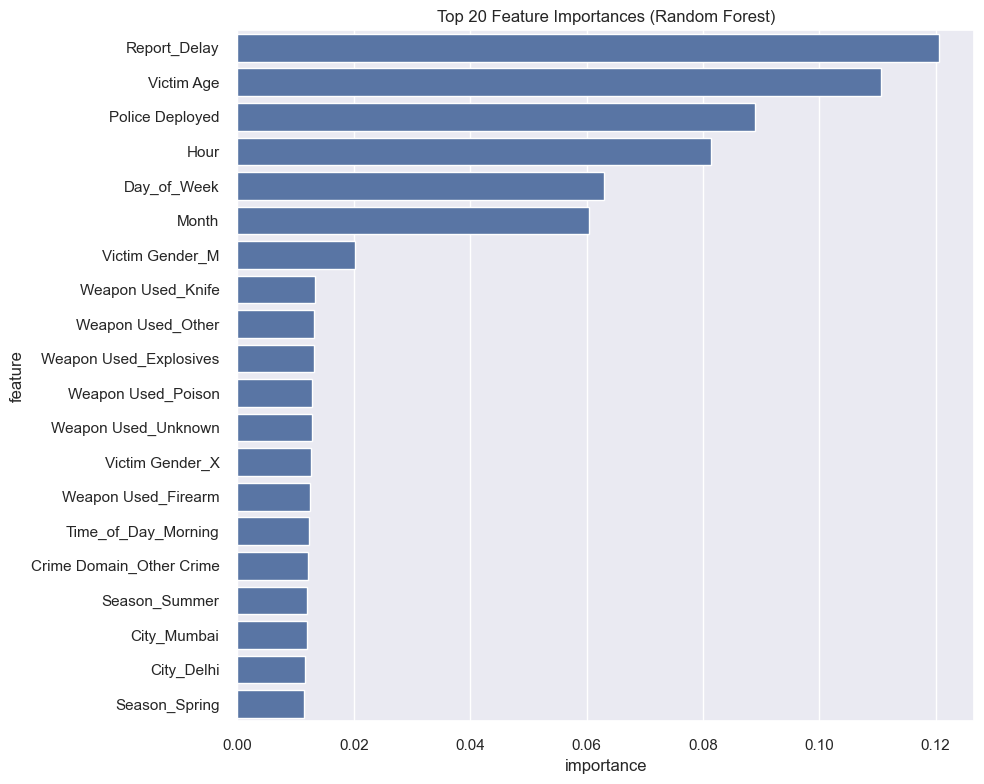

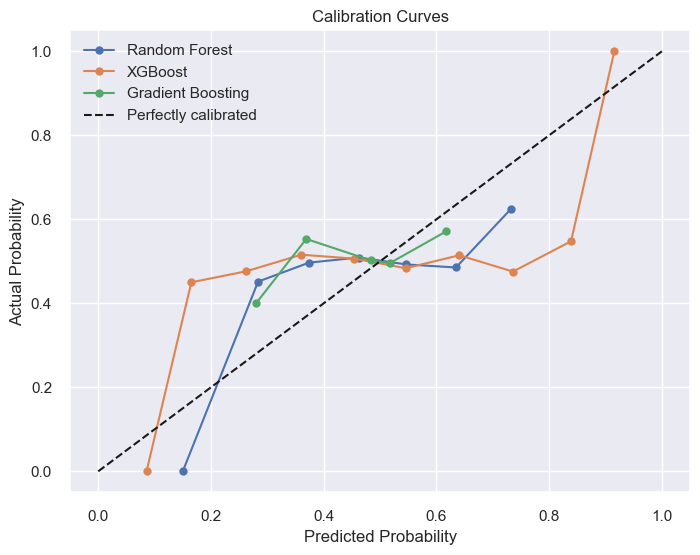

Saved Random Forest -> random_forest_model.joblib
Saved XGBoost -> xgboost_model.joblib
Saved Gradient Boosting -> gradient_boosting_model.joblib

All done — models trained, evaluated, and saved. Check printed outputs and figures.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
import xgboost as xgb
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import textwrap
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from packaging import version
import joblib

# ------------------------------
# OneHotEncoder compatibility
# ------------------------------
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
else:
    onehot_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Use seaborn theme (safe)
sns.set_theme()

# ------------------------------
# Helper: standardize date parser
# ------------------------------
def standardize_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')
    except Exception:
        try:
            return pd.to_datetime(date_str, format='%m-%d-%Y %H:%M')
        except Exception:
            try:
                return pd.to_datetime(date_str)  # fallback to pandas parser
            except Exception:
                return pd.NaT

# ------------------------------
# Ensure df exists
# ------------------------------
# (Assumes `df` already loaded in your session)
if 'df' not in globals():
    raise RuntimeError("DataFrame 'df' not found. Load your dataframe into the variable `df` before running this script.")

# ------------------------------
# Convert date/time columns
# ------------------------------
date_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed', 'Time of Occurrence']
for col in date_columns:
    if col in df.columns:
        df[col] = df[col].apply(standardize_date)
    else:
        # create empty column if missing so downstream code doesn't fail
        df[col] = pd.NaT

# ------------------------------
# Feature engineering (safe)
# ------------------------------
df['Year'] = df['Date of Occurrence'].dt.year
df['Month'] = df['Date of Occurrence'].dt.month
df['Day_of_Week'] = df['Date of Occurrence'].dt.dayofweek
df['Hour'] = df['Time of Occurrence'].dt.hour
df['Report_Delay'] = (df['Date Reported'] - df['Date of Occurrence']).dt.total_seconds() / (24 * 3600)  # days

# Season and Time_of_Day (guard against NaNs)
df['Month'] = df['Month'].fillna(0).astype(int)
df['Hour'] = df['Hour'].fillna(0).astype(int)

df['Season'] = pd.cut(df['Month'],
                      bins=[-1,3,6,9,12],
                      labels=['Winter', 'Spring', 'Summer', 'Fall'])
df['Time_of_Day'] = pd.cut(df['Hour'],
                           bins=[-1,6,12,18,24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# ------------------------------
# Columns to use (only if present)
# ------------------------------
categorical_features = ['City', 'Crime Description', 'Victim Gender', 'Weapon Used',
                        'Crime Domain', 'Season', 'Time_of_Day']
numerical_features = ['Victim Age', 'Police Deployed', 'Report_Delay', 'Hour',
                      'Day_of_Week', 'Month']

# retain only existing columns
categorical_features = [c for c in categorical_features if c in df.columns]
numerical_features = [c for c in numerical_features if c in df.columns]

# Fill missing values for categorical columns with 'Unknown'
for col in categorical_features:
    if pd.api.types.is_categorical_dtype(df.get(col)):
        df[col] = df[col].cat.add_categories(['Unknown']).fillna('Unknown')
    else:
        df[col] = df[col].fillna('Unknown').astype(str)

# Fill missing numeric columns with NaN (imputer will handle)
for col in numerical_features:
    if col in df.columns:
        # convert to numeric when possible
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ------------------------------
# Target variable (safe mapping)
# ------------------------------
if 'Case Closed' not in df.columns:
    raise RuntimeError("Target column 'Case Closed' not found in df.")

y = df['Case Closed'].map({'Yes': 1, 'No': 0})
# if there are other representations (True/False), coerce
y = y.fillna(df['Case Closed'].map({True:1, False:0})).fillna(-1)
# Drop rows with unknown target
mask_valid = y.isin([0,1])
df = df.loc[mask_valid].copy()
y = y.loc[mask_valid].astype(int)

# Prepare X
X = df[numerical_features + categorical_features]

# ------------------------------
# Preprocessing pipelines (fix: name the onehot step)
# ------------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', onehot_encoder)   # <- named step required
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')   # drop other columns

# ------------------------------
# Model pipelines
# ------------------------------
models = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        # avoid label encoder warning and set a safe eval metric
        ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

# ------------------------------
# Train/test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ------------------------------
# Train & evaluate
# ------------------------------
results = {}
feature_importance = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    # Some classifiers may not implement predict_proba in rare cases; handle safely
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    except Exception:
        # fall back to decision_function normalized
        try:
            scores = model.decision_function(X_test)
            # scale to [0,1]
            y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())
        except Exception:
            y_pred_proba = np.zeros(len(y_test))

    # Metrics
    results[name] = {
        'accuracy': model.score(X_test, y_test),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else np.nan,
        'classification_report': classification_report(y_test, y_pred, zero_division=0),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Feature importance (for tree models)
    if name in ['Random Forest', 'Gradient Boosting']:
        # Build feature names after preprocessing
        preproc = model.named_steps['preprocessor']
        # numerical names are simple
        feature_names = []
        feature_names.extend(numerical_features)

        # get onehot categories (use categories_ attr)
        try:
            cat_pipeline = preproc.named_transformers_['cat']  # pipeline
            ohe = cat_pipeline.named_steps['onehot']
            categories = ohe.categories_
            # for each categorical feature, append names (taking into account drop='first')
            for feat, cats in zip(categorical_features, categories):
                # when drop='first' we dropped first category — so we list categories[1:]
                for val in cats[1:]:
                    feature_names.append(f"{feat}_{val}")
        except Exception as e:
            # fallback if something unexpected happens
            print(f"Warning: couldn't build expanded feature names for {name}: {e}")
            feature_names = numerical_features + categorical_features

        feature_importance[name] = {
            'names': feature_names,
            'importance': model.named_steps['classifier'].feature_importances_
        }

# ------------------------------
# Simple text output of results
# ------------------------------
print("\nDetailed Model Results:")
for name, result in results.items():
    accuracy = result['accuracy']
    emoji = "😟"
    if accuracy > 0.85:
        emoji = "🎉🎉"
    elif accuracy > 0.75:
        emoji = "🎉"
    elif accuracy > 0.65:
        emoji = "👍"

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f} {emoji}")
    print(f"ROC AUC: {result['roc_auc']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])

# ------------------------------
# Feature importance plotting (example for Random Forest)
# ------------------------------
if 'Random Forest' in feature_importance:
    rf_imp = feature_importance['Random Forest']
    importance_df = pd.DataFrame({
        'feature': rf_imp['names'],
        'importance': rf_imp['importance']
    }).sort_values('importance', ascending=False).head(20)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=importance_df, palette=None)
    plt.title("Top 20 Feature Importances (Random Forest)")
    plt.tight_layout()
    plt.show()

# ------------------------------
# Calibration plot
# ------------------------------
plt.figure(figsize=(8, 6))
for name, model in models.items():
    try:
        prob_pos = model.predict_proba(X_test)[:, 1]
        frac_pos, mean_pred = calibration_curve(y_test, prob_pos, n_bins=10)
        plt.plot(mean_pred, frac_pos, marker='o', label=name)
    except Exception as e:
        print(f"Skipping calibration for {name}: {e}")

plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Probability")
plt.title("Calibration Curves")
plt.legend()
plt.show()

# ------------------------------
# Save models
# ------------------------------
for name, model in models.items():
    fname = f"{name.lower().replace(' ', '_')}_model.joblib"
    joblib.dump(model, fname)
    print(f"Saved {name} -> {fname}")

print("\nAll done — models trained, evaluated, and saved. Check printed outputs and figures.")


Tried to cheer myself up with emojis... it didn't work.